In [46]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [47]:
dataset = pd.read_csv('processed-penguins.csv')

In [48]:
dataset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,18.1,0,3.750
1,Adelie,39.5,17.4,18.6,1,3.800
2,Adelie,40.3,18.0,19.5,1,3.250
3,Adelie,39.6,17.7,18.6,1,3.500
4,Adelie,36.7,19.3,19.3,1,3.450
...,...,...,...,...,...,...
145,Chinstrap,50.8,18.5,20.1,0,4.450
146,Chinstrap,50.1,17.9,19.0,1,3.400
147,Chinstrap,49.0,19.6,21.2,0,4.300
148,Chinstrap,51.5,18.7,18.7,0,3.250


In [49]:
col = list(dataset.columns.values)

In [50]:
dataset = dataset[col[1:]+[col[0]]]

In [51]:
Features = {1:'bill_length_mm',2:'bill_depth_mm',3:'flipper_length_mm',4:'gender',5:'body_mass_g'}

In [52]:
Species = {1:'Adelie',2:'Gentoo',3:'Chinstrap'}

In [53]:
def CreateTrainAndTestDataframes (class1, class2):
    df1 = dataset[dataset['species']==Species[class1]]
    df2 = dataset[dataset['species']==Species[class2]]
    
    df1_train = df1.sample(frac=0.6,random_state=1)
    df2_train = df2.sample(frac=0.6,random_state=1)
    
    df1_test = df1.loc[~df1.index.isin(df1_train.index)]
    df2_test = df2.loc[~df2.index.isin(df2_train.index)]
    
    result = df1_train.append(df2_train, ignore_index=True)
    df_train = result.sample(frac=1, random_state=1).reset_index()
    
    Result = df1_test.append(df2_test, ignore_index=True)
    df_test = Result.sample(frac=1, random_state=1).reset_index()
    
    return df_train,df_test

In [54]:
train, test = CreateTrainAndTestDataframes(1,2)

C:\Users\NOURKA~1\AppData\Local\Temp/ipykernel_76/901440417.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = df1_train.append(df2_train, ignore_index=True)
C:\Users\NOURKA~1\AppData\Local\Temp/ipykernel_76/901440417.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result = df1_test.append(df2_test, ignore_index=True)


In [55]:
def SelectFeatures(f1,f2):
    X_train = train[[Features[f1],Features[f2]]]
    X_test = test[[Features[f1],Features[f2]]]
    
    Y_train = train[['species']]
    Y_test = test[['species']]
    
    return X_train, Y_train,X_test, Y_test

In [56]:
X_train, Y_train,X_test, Y_test= SelectFeatures(1,2)

In [57]:
class Perceptron:

    def __init__(self, class1, class2, lr=0.01, epochs=1000, add_bias=True,threshold=0):
        self.lr = lr
        self.epochs = epochs
        self.threshold = threshold
        self.activation_function = self.signum_f
        self.weights = None
        self.bias = 0
        self.add_bias = add_bias
        self.class1 = class1
        self.class2 = class2
    
    def calculateMSE(self, trueLabels, predictedLabels,numOfTrainedSamples):
        mse = 0.5 * np.sum((trueLabels-predictedLabels)**2)
        mse /= numOfTrainedSamples
        return mse
        
    def fit(self, X,Y):
        M_samples, N_features= X.shape
        
        #init weights
        w= np.zeros(N_features)
        random.seed(0)
        for i in range(N_features):
            w[i]=random.random()
        self.weights= w
        if(self.add_bias):
            self.bias= random.random()
        
        # convert y to 1 and -1
        y_converted = Y.to_numpy()
        y = np.array([1 if i == Species[self.class1] else -1 for i in y_converted])
        
        x= X.to_numpy()
        for _ in range(self.epochs):
            for indx, x_i in enumerate(x):
                linear_output= np.dot(x_i,self.weights)
                if(self.add_bias):
                    linear_output+=self.bias
                y_predict= self.activation_function(linear_output)
                
                update = self.lr * (y[indx]- y_predict)
                self.weights += update * x_i
                if(self.add_bias):
                    self.bias+=update
            if (self.calculateMSE(y[indx], y_predict,M_samples) <= self.threshold):
                break 

    # X is np array
    def predict(self, X):
        linear_out = np.dot(X, self.weights)
        if (self.add_bias):
            linear_out += self.bias
        y_predicted = self.activation_function(linear_out)
        return y_predicted

    def signum_f(self, x):
        return np.where(x >= 0, 1, -1)

In [58]:
# needing to conver y_true into into 1 and -1 np array
def accuracy(y_true, y_predict):
    acccuray= np.sum(y_true==y_predict)/ len(y_true)
    return acccuray

In [59]:
p = Perceptron(1,2,threshold= 0.3)
p.fit(X_train,Y_train)
predictions = p.predict(X_test)

In [60]:
y_converted = Y_test.to_numpy()
y=np.array([1 if i==Species[1] else -1 for i in y_converted])
print("accuracy: ", accuracy(y,predictions))

accuracy:  0.5


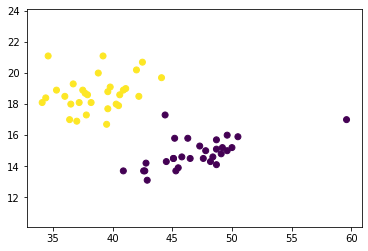

In [62]:
xtrain = X_train.to_numpy()
y_converted = Y_train.to_numpy()
y=np.array([1 if i==Species[1] else -1 for i in y_converted])
        

fig= plt.figure()
ax= fig.add_subplot(1,1,1)
plt.scatter(xtrain[:,0],xtrain[:,1], marker='o', c=y)

x01=np.amin(xtrain[:,0])
x02=np.amax(xtrain[:,0])

x11=(-p.weights[0]* x01 - p.bias)/ p.weights[1]
x12=(-p.weights[0]* x02 - p.bias)/ p.weights[1]

ax.plot([x01,x02],[x11,x12],'k')

ymin= np.amin(xtrain[:,1])
ymax =np.amax(xtrain[:,1])

ax.set_ylim([ymin-3,ymax+3])

plt.show()